In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/college_student_placement_dataset.csv")

In [24]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [5]:
df.shape

(10000, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [7]:
df.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [8]:
df.isna().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [13]:
df_ = df.drop(["College_ID","Internship_Experience","Placement"], axis=1)

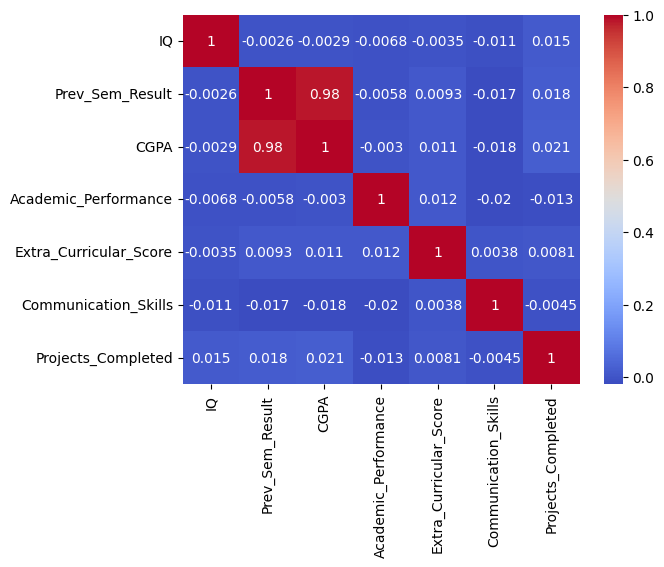

In [15]:
cor = df_.corr()
sns.heatmap(cor, annot=True,cmap = 'coolwarm')
plt.show()

In [26]:
x = df.drop(["Placement", "College_ID"], axis = 1)
x = pd.get_dummies(x, columns=["Internship_Experience"], drop_first=True)
y = df["Placement"]

In [27]:
y.value_counts()

,count
Placement,
No,8341
Yes,1659


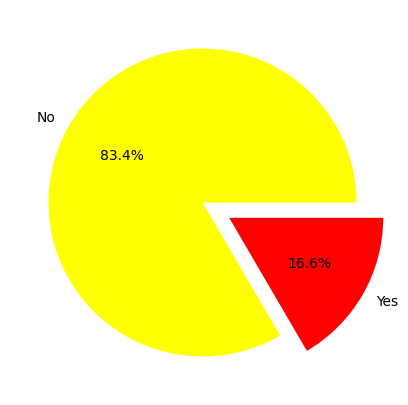

In [28]:
plt.figure(figsize=(10,5))
plt.pie(
     df['Placement'].value_counts().values,
    labels=['No', 'Yes'],
    explode=[0, 0.2],
    autopct='%1.1f%%',
    colors = ["yellow","red"]
)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
len(x_train),len(x_test)

(8000, 2000)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [37]:
from sklearn.metrics import *
lr_accurate = accuracy_score(y_pred,y_test)
lr_accurate*100

90.4

In [38]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1610,   64],
       [ 128,  198]])

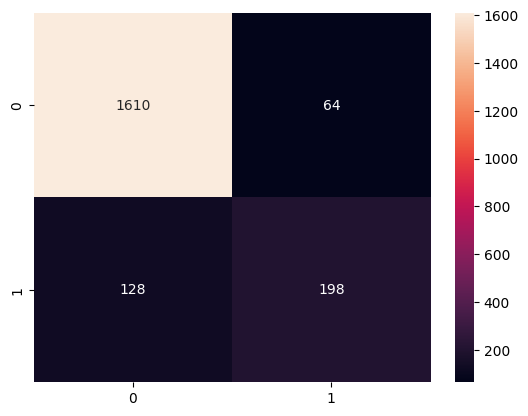

In [39]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [46]:
knn_accuracy = accuracy_score(y_pred,y_test)
knn_accuracy*100

94.3

In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1636,   38],
       [  76,  250]])

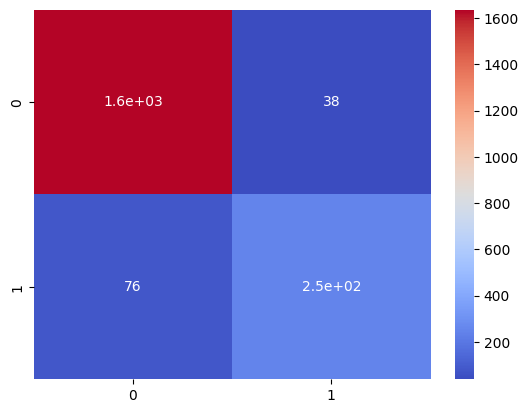

In [48]:
sns.heatmap(cm,annot=True,cmap='coolwarm')
plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rm = RandomForestClassifier(n_estimators=10)
rm.fit(x_train,y_train)
y_pred = rm.predict(x_test)

In [56]:
rm_accuracy = accuracy_score(y_pred,y_test)
rm_accuracy*100

99.75

In [57]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1674,    0],
       [   5,  321]])

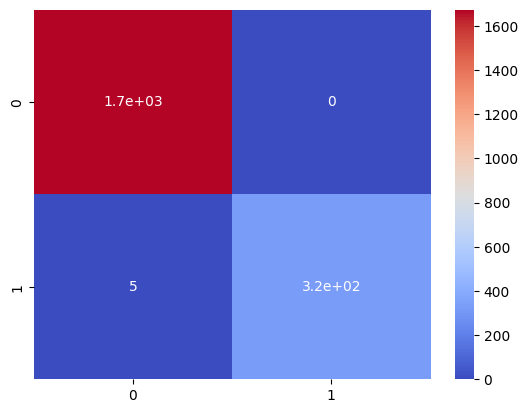

In [58]:
sns.heatmap(cm,annot = True,cmap='coolwarm')
plt.show()

In [59]:
model_results = {
    "Logistic Regression": lr_accurate*100,
    "K-Neighbors Classifier": knn_accuracy*100,
    "Random Forest Classifier": rm_accuracy*100
}

df_results = pd.DataFrame(list(model_results.items()), columns=["Model", "Accuracy"])
print(df_results)

                      Model  Accuracy
0       Logistic Regression     90.40
1    K-Neighbors Classifier     94.30
2  Random Forest Classifier     99.75
